In [4]:
import os
import re
from collections import defaultdict
import json
import matplotlib.pylab as plt

In [5]:
MATCH_REGEX = re.compile(r"[+-]?\b(\d+([.]\d*)?([eE][+-]?\d+)?|[.]\d+([eE][+-]?\d+)?)\b")

def extract_values(string, params):
    result = dict()
    if "train_loss" in string:
        found_vals = [re_match[0] for re_match in re.findall(MATCH_REGEX, string)]
    
        if len(params) == len(found_vals):
            for name, val in zip(params, found_vals):
                result[name] = float(val)
    return result

def plot_results(train_loss_list, val_loss_list, val_bleu_list, run_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    
    ax1.plot(range(len(train_loss_list)), train_loss_list, label='train loss')
    ax1.plot(range(len(val_loss_list)), val_loss_list, label='val loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.legend()
    
    ax2.plot(range(len(val_bleu_list)), val_bleu_list, label='val bleu')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('BLEU')
    ax2.legend()
    
    fig.suptitle(run_name, fontsize=20)
    plt.show()

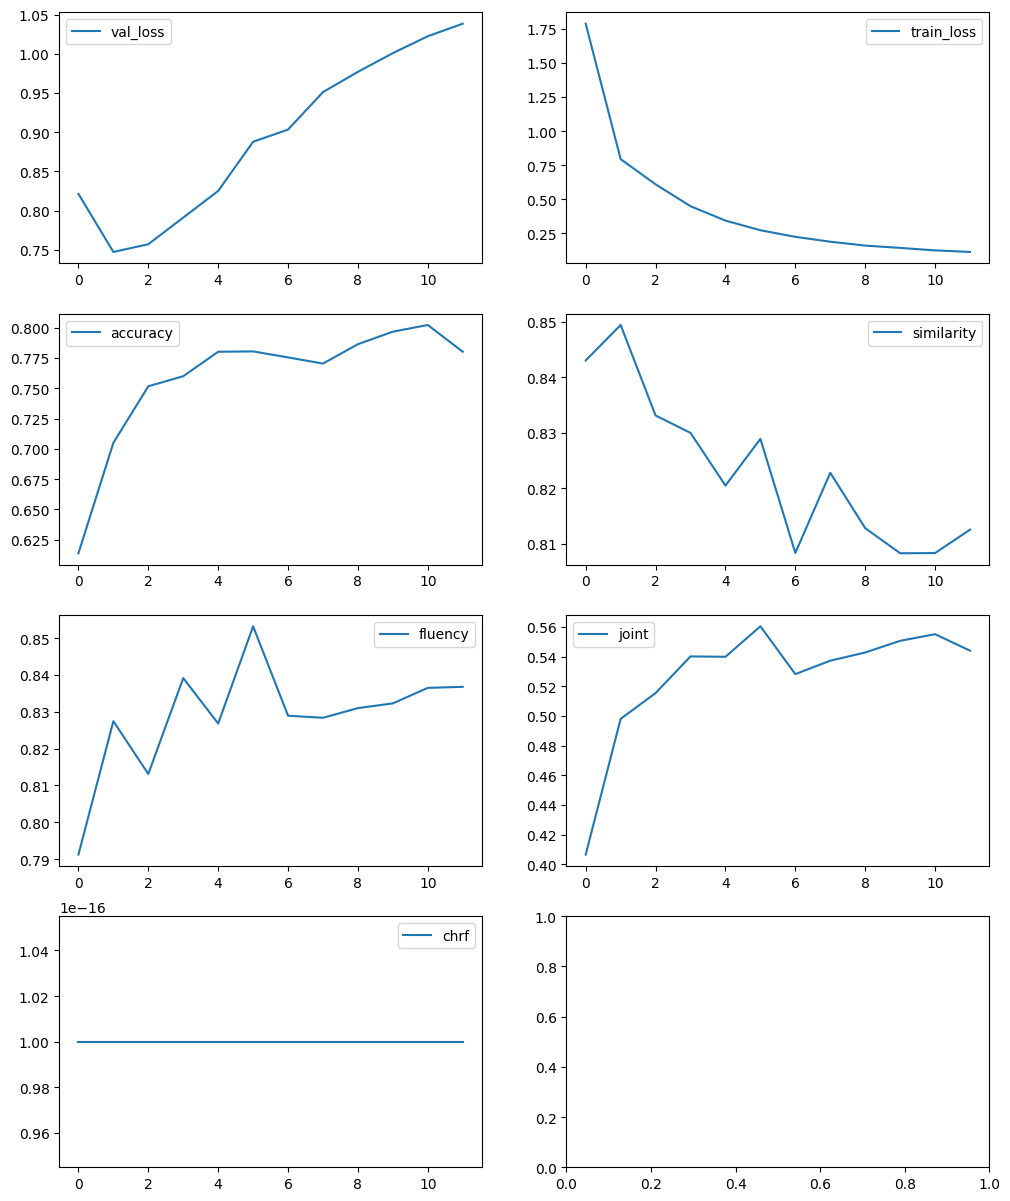

In [6]:
DATAPATH = '../training_logs'
params = ['val_loss', 'train_loss', 'accuracy', 'similarity', 'fluency', 'joint', 'chrf']
progress_file_path = os.path.join(DATAPATH, "progress_log.txt")
file_content = open(progress_file_path, 'r').read().split("\n")

logs_list = defaultdict(list)
for line in file_content:
    d = extract_values(line, params)
    if len(d) > 0:
        for param in params:
            logs_list[param].append(d[param])

fig, axs = plt.subplots(4, 2, figsize=(12, 15))
for m, param in enumerate(params):
    i = int(m / 2)
    j = int(m % 2)
    axs[i, j].plot(logs_list[param], label=param)
    axs[i, j].legend()

In [7]:
from transformers import AutoTokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'transformers'

In [13]:
tokenizer = AutoTokenizer.from_pretrained('sberbank-ai/ruT5-base')

In [30]:
train = pd.read_csv('data/input/train.tsv', sep='\t', index_col=0)
dev = pd.read_csv('data/input/dev.tsv', sep='\t', index_col=None)
test = pd.read_csv('data/input/test.tsv', sep='\t', index_col=None)

(-2.0, 30.0)

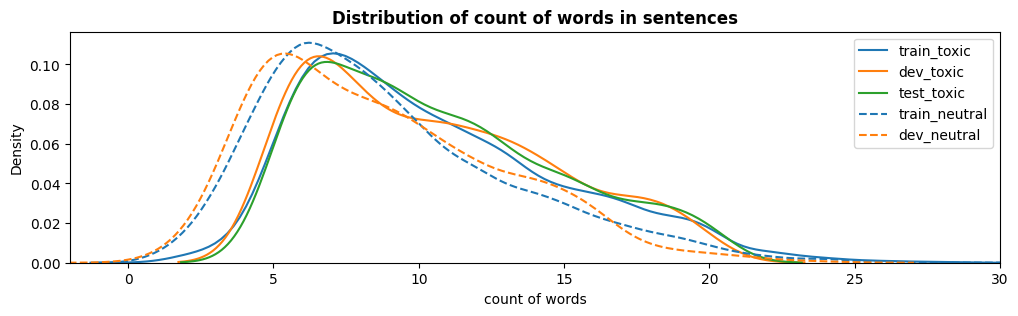

In [113]:
plt.figure(figsize=(12, 3))
plt.tight_layout()
plt.title('Distribution of count of words in sentences', weight='bold')
for m, (label, sample) in enumerate([('train', train), ('dev', dev), ('test', test)]):
    sns.kdeplot(sample['toxic_comment'].str.split(' ').apply(len), label=label+'_toxic', color=f'C{m}')

for m, (label, sample) in enumerate([('train', train), ('dev', dev)]):
    x = sum([sample[f'neutral_comment{i+1}'].dropna().tolist() for i in range(3)], start=[])
    x = list(map(lambda x: len(x.split(' ')), x))
    sns.kdeplot(x, label=label+'_neutral', linestyle='--', color=f'C{m}')
    
plt.xlabel('count of words')
plt.legend()
plt.xlim(-2, 30)

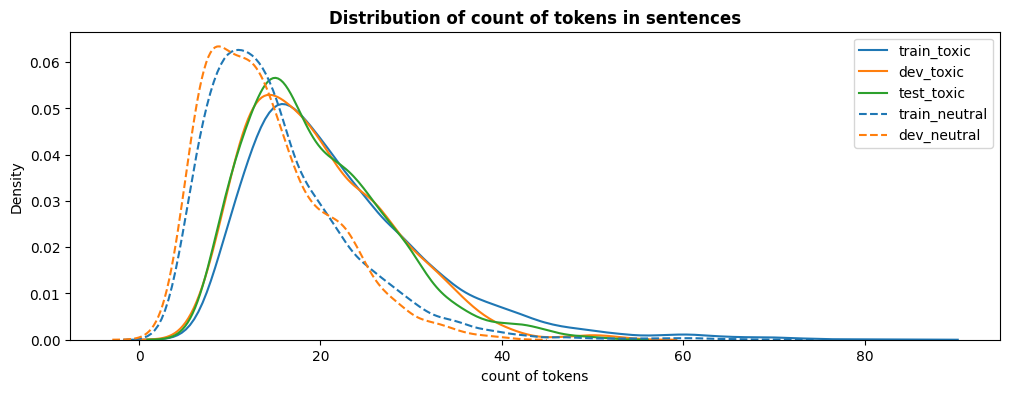

In [69]:
plt.figure(figsize=(12, 4))
plt.title('Distribution of count of tokens in sentences', weight='bold')
for m, (label, sample) in enumerate([('train', train), ('dev', dev), ('test', test)]):
    sns.kdeplot(sample['toxic_comment'].apply(lambda x: tokenizer.encode(x)).apply(len), label=label+'_toxic', color=f'C{m}')

for m, (label, sample) in enumerate([('train', train), ('dev', dev)]):
    x = sum([sample[f'neutral_comment{i+1}'].dropna().tolist() for i in range(3)], start=[])
    x = list(map(lambda x: len(tokenizer.encode(x)), x))
    sns.kdeplot(x, label=label+'_neutral', linestyle='--', color=f'C{m}')
    
plt.xlabel('count of tokens')
plt.legend()
# plt.xlim(-2, 30)

In [110]:
train_neutral_comms = np.sum(train[[f'neutral_comment{i+1}' for i in range(3)]].fillna('').values != '', axis=1)[1/]
np.unique(train_neutral_comms, return_counts=True)[1] / sum(train_neutral_comms)

array([0.54663212, 0.31059298, 0.1427749 ])

In [111]:
np.unique(np.sum(dev[[f'neutral_comment{i+1}' for i in range(3)]].fillna('').values != '', axis=1), return_counts=True)[1] / sum([540, 204,  56])

array([0.675, 0.255, 0.07 ])

In [35]:
a = df['toxic_comment'].apply(lambda x: tokenizer.encode(x)).apply(len).values

In [41]:
a = df['neutral_comment1'].apply(lambda x: tokenizer.encode(x)).apply(len).values

In [116]:
train.sample(5)

,toxic_comment,neutral_comment1,neutral_comment2,neutral_comment3
index,,,,
4745,"ниче не устанавливается.. пиздец, я хотела зав...",Ничего не устанавливается. Я хотела завтра в л...,NaN,NaN
5055,"это пиздец, ребятки=( /","это кошмар , ребятки=( /","Это конец, ребятки",Это конец ребятки
1922,Скопил! Аха-ха-ха-ха! Скопил! Во отмочил шутку! ),Скопил! Аха-ха-ха! Скопил! Во пошутил!),NaN,NaN
521,не каждый актёр пропогандон и не каждый пропог...,Не каждый актёр пропагандирует и не каждый про...,не каждый актёр пропагандист и не каждый пропа...,NaN
3740,"Админка в wordpress уебишно тормозит, после NG...","Админка в wordpress тормозит, после NGCMS нач...","Админка в Wordpress жутко тормозит,после NGCMS...","Админка в wordpress виснет, после NGCMS удивля..."


In [42]:
np.quantile(a, 0.98)

36.0

In [125]:
len(df_output[df_output[0] != df['toxic_comment']][0].iloc[0].split())

14

In [123]:
df[df_output[0] != df['toxic_comment']]['toxic_comment'].iloc[0]

'В такой ситуации виноваты пидарасы из Ростелекома у которых даже кошка может купить фильм с пульта. Дебилы блять.'

In [90]:
pd.concat([df, df])

,toxic_comment,neutral_comment1,neutral_comment2,neutral_comment3
index,,,,
0,"и,чё,блядь где этот херой был до этого со свои...","Ну и где этот герой был,со своими доказательст...",Где этот герой был до этого со своими доказате...,"и,где этот герой был до этого со своими доказа..."
1,"О, а есть деанон этого петуха?","О, а есть деанон",NaN,NaN
2,"херну всякую пишут,из-за этого лайка.долбоебизм.","Чушь всякую пишут, из- за этого лайка.","Ерунду всякую пишут,из-за этого лайка.",NaN
3,из за таких пидоров мы и страдаем,из за таких плохих людей мы и страдаем,Из-за таких людей мы и страдаем,из за таких как он мы и страдаем
4,гондон путинский он а не артист,"Человек Путина он, а не артист",NaN,NaN
...,...,...,...,...
6943,"Блядь, пусть его уже закроют до конца его дней...","Пусть его уже закроют до конца его дней, он же...",NaN,NaN
6944,твоя химия это тотальный пиздец(,твоя химия - это просто кошмар,NaN,NaN
6945,"меня изнасиловали, мудилка, а тебе пох(((","меня изнасиловали,а тебе всё равно (((",NaN,NaN


In [91]:
df

,toxic_comment,neutral_comment1,neutral_comment2,neutral_comment3
index,,,,
0,"и,чё,блядь где этот херой был до этого со свои...","Ну и где этот герой был,со своими доказательст...",Где этот герой был до этого со своими доказате...,"и,где этот герой был до этого со своими доказа..."
1,"О, а есть деанон этого петуха?","О, а есть деанон",NaN,NaN
2,"херну всякую пишут,из-за этого лайка.долбоебизм.","Чушь всякую пишут, из- за этого лайка.","Ерунду всякую пишут,из-за этого лайка.",NaN
3,из за таких пидоров мы и страдаем,из за таких плохих людей мы и страдаем,Из-за таких людей мы и страдаем,из за таких как он мы и страдаем
4,гондон путинский он а не артист,"Человек Путина он, а не артист",NaN,NaN
...,...,...,...,...
6943,"Блядь, пусть его уже закроют до конца его дней...","Пусть его уже закроют до конца его дней, он же...",NaN,NaN
6944,твоя химия это тотальный пиздец(,твоя химия - это просто кошмар,NaN,NaN
6945,"меня изнасиловали, мудилка, а тебе пох(((","меня изнасиловали,а тебе всё равно (((",NaN,NaN
